## ■ CNN


__합성곱 :__ 이미지의 특징을 잡아내는 역활  
__풀링 :__ 이미지를 선명하게 하는 역활  
__완전연결계층 :__ 분류  

## 문제71.  
## 어제 만들었던 convolution 클래스를 객체화 시켜서   
## 28x28 이미지를 5x5 필터로 3차원 합성곱하여 feature map을 생성하시오~

In [1]:
# 1. 28x28의 3차원 이미지 한장을 생성

import numpy as np
x1 = np.random.randn(1,3,28,28)
print(x1.shape)

(1, 3, 28, 28)


In [ ]:
# 2. 5x5 RGB 필터를 10개를 생성

filter = np.random.randn(10,3,5,5)
b1 = 1 # bias값 설정

In [4]:
# 3. 설현 이미지 한장과 필터 10개를 합성곱 한다.(p.246)
# 1,2 참고해서 표현하기(Summary)
# __init__ 함수(self, W, b, stride=1, pad=0)

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col


class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self,x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H + 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        return out
    
import numpy as np
x1 = np.random.randn(1,3,28,28)
filter = np.random.randn(10,3,5,5)
b1 = 1 

conv1 = Convolution(filter, b1, 1, pad =0)
fe_map = conv1.forward(x1)
print( 'fe_map 의 shape 는 ', fe_map.shape)

fe_map 의 shape 는  (1, 10, 24, 24)


## ■ 풀링 계층 구현하기 p.247

__convolution 층__이 이미지의 특징을 잡아내는 역활을 한다면  
__pooling층__은 이미지를 선명하게 만드는 역활을 한다.

__" 말 그대로 출력값에서 일부분만 취하는 기능 "__

convolution 층이 이렇게 저렇게 망쳐놓은 그림들을 가지고  
feature map 이미지의 각 부분에서 대표들을 뽑아 사이즈가 작은 이미지를 만드는 것을 말한다.

마치 사진을 축소하면 해상도가 좋아지는 듯한 효과와 비슷하다.

### 딥러닝 게시판 : 161. 7장 cnn 이해를 돕기 위한 그림들

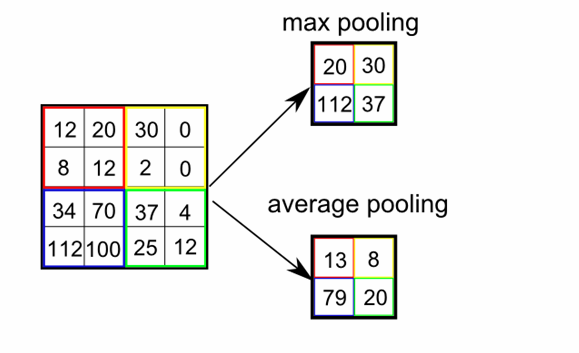

1. 최대 풀링 : feature map 에서 가장 큰 값을 대표값으로 선정
2. 평균 풀링 : feature map 에서 모든 값의 평균값을 대표값으로 선정
3. 확률적 풀링 : feature map 에서 임의 데이터 한개를 선정

## 예제1. 파이썬으로 아래의 행렬을 만들고 maxpooling을 시도해서 아래의 결과를 출력하시오~
### 책 p.248 그림 7-21 참고

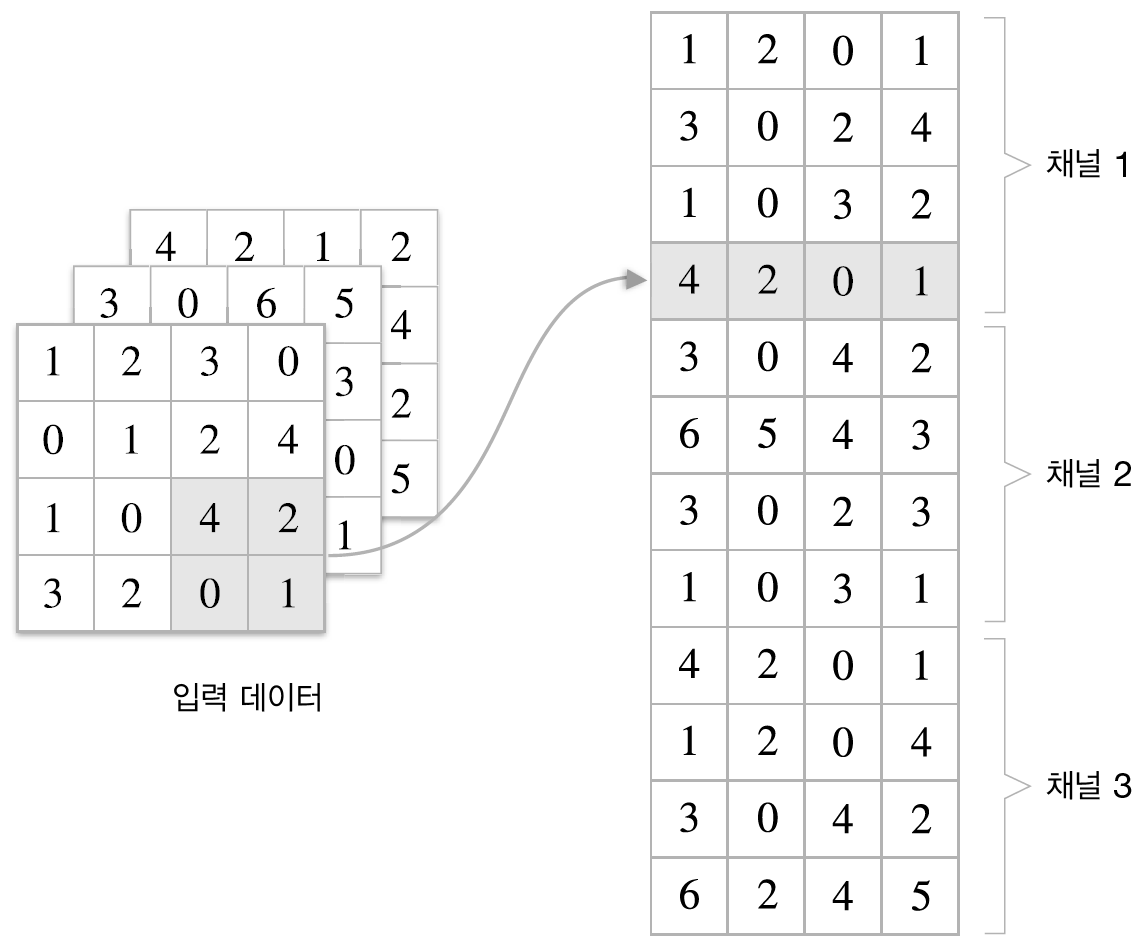

In [6]:
import numpy as np
x = np.array([[21,8,8,12],[12,19,9,7],[8,10,4,3],[18,12,9,10]])
print(x.shape) #(4,4)

# result = np.array([[21,12],[18,10]])
x2 = x.reshape(1,1,4,4) # 2차원을 4차원 행렬로 변환

a = im2col(x2, 2, 2, 2, 0) 
# 원본이미지 x2를 필터사이즈에 맞춰서 합성곱하기 좋도록 2차원으로 바꾼다.
# 입력데이터x  = x2 , 필터가로(FH) = 2, 필터세로(FW) = 2, stride = 2, pad = 0
print(a)

(4, 4)
[[21.  8. 12. 19.]
 [ 8. 12.  9.  7.]
 [ 8. 10. 18. 12.]
 [ 4.  3.  9. 10.]]


## 예제2. im2col을 이용해서 출력한 결과에서 max값만 취해서 아래의 결과가 출력되게 하시오!

In [8]:
a2 = np.max(a, axis = 1) # 0은 열이고, 1이 행
print(a2) # [21 12 18 10]
a3 = a2.reshape(2,2)
print(a3)

[21. 12. 18. 10.]
[[21. 12.]
 [18. 10.]]


## ■ RGB 컬러일때의 Maxpooling 하는 방법( 책 p.248 그림7-22)

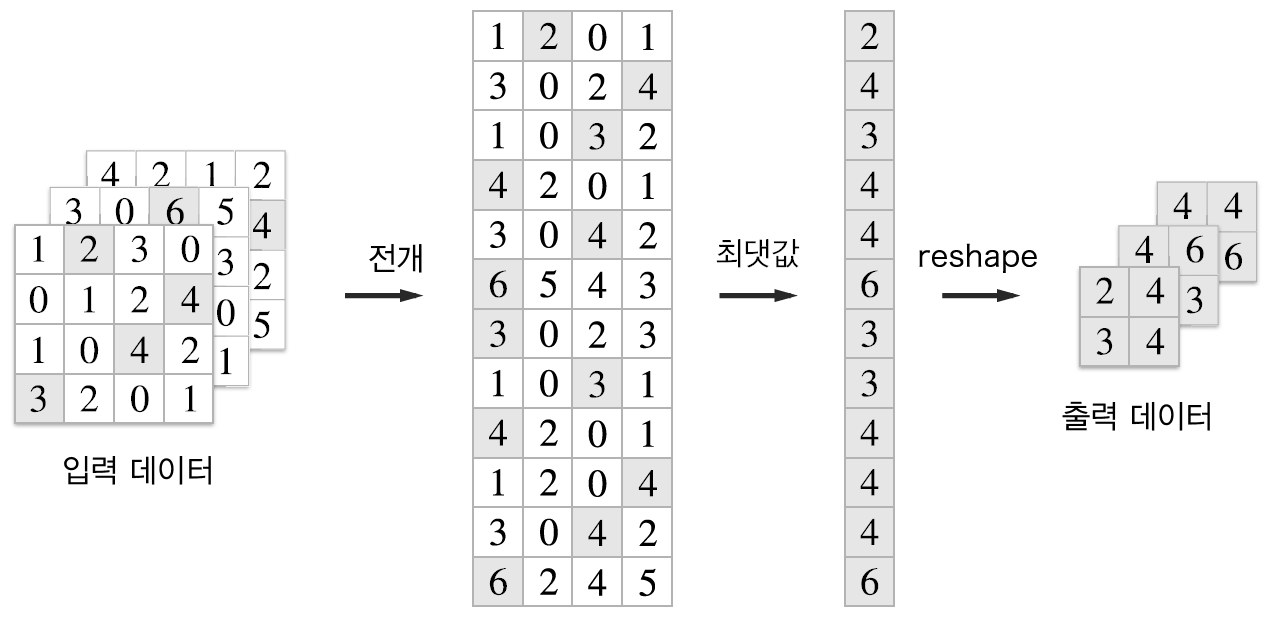

### ※ 진행 순서

1. 입력 데이터 x를 4차원으로 변경
2. im2col로 2차원으로 변경
3. np.max의 axis=1로 해서 행의 최대값을 취함.
4. 최대값만 취한 데이터를 다시 4차원으로 reshape(N, H, W, C)
5. N, H, W, C -----> N, C, H, W 로 transpose 해주어야 한다.

In [10]:
x = np.array([[[21,8,8,12],[12,19,9,7],[8,10,4,3],[18,12,9,10]],
              [[19,8,7,12],[1,19,9,7],[4,2,4,3],[4,12,9,10]],
              [[2,8,8,12],[10,19,9,7],[5,6,4,3],[1,12,9,12]]])

print(x)

[[[21  8  8 12]
  [12 19  9  7]
  [ 8 10  4  3]
  [18 12  9 10]]

 [[19  8  7 12]
  [ 1 19  9  7]
  [ 4  2  4  3]
  [ 4 12  9 10]]

 [[ 2  8  8 12]
  [10 19  9  7]
  [ 5  6  4  3]
  [ 1 12  9 12]]]


## 1. 입력 데이터 x를 4차원으로 변경

In [16]:
x = np.array([[[21,8,8,12],[12,19,9,7],[8,10,4,3],[18,12,9,10]],
              [[19,8,7,12],[1,19,9,7],[4,2,4,3],[4,12,9,10]],
              [[2,8,8,12],[10,19,9,7],[5,6,4,3],[1,12,9,12]]])
x2 = x.reshape(1,3,4,4)

print(x2)
print(x2.shape)

(3, 4, 4)
[[[[21  8  8 12]
   [12 19  9  7]
   [ 8 10  4  3]
   [18 12  9 10]]

  [[19  8  7 12]
   [ 1 19  9  7]
   [ 4  2  4  3]
   [ 4 12  9 10]]

  [[ 2  8  8 12]
   [10 19  9  7]
   [ 5  6  4  3]
   [ 1 12  9 12]]]]
(1, 3, 4, 4)


## 2. im2col 함수로 2차원을 변경

In [18]:
b = im2col(x2, 2, 2, 2, 0)
print(b)

c = b.reshape(-1, 4) # 열은 꼭 4열을 지켜서 모양을 변경해라~
print(c)

[[21.  8. 12. 19. 19.  8.  1. 19.  2.  8. 10. 19.]
 [ 8. 12.  9.  7.  7. 12.  9.  7.  8. 12.  9.  7.]
 [ 8. 10. 18. 12.  4.  2.  4. 12.  5.  6.  1. 12.]
 [ 4.  3.  9. 10.  4.  3.  9. 10.  4.  3.  9. 12.]]
[[21.  8. 12. 19.]
 [19.  8.  1. 19.]
 [ 2.  8. 10. 19.]
 [ 8. 12.  9.  7.]
 [ 7. 12.  9.  7.]
 [ 8. 12.  9.  7.]
 [ 8. 10. 18. 12.]
 [ 4.  2.  4. 12.]
 [ 5.  6.  1. 12.]
 [ 4.  3.  9. 10.]
 [ 4.  3.  9. 10.]
 [ 4.  3.  9. 12.]]


## 3. np.max 함수의 axis = 1로 행에서의 최대값을 취하여라

In [20]:
b = im2col(x2, 2, 2, 2, 0)

c = b.reshape(-1, 4) # 열은 꼭 4열을 지켜서 모양을 변경해라~

d = np.max(c,axis=1)
print(d)

[21. 19. 19. 12. 12. 12. 18. 12. 12. 10. 10. 12.]


## 4. 최대값만 취한 데이터를 다시 4차원으로 reshape

In [21]:
b = im2col(x2, 2, 2, 2, 0)

c = b.reshape(-1, 4) # 열은 꼭 4열을 지켜서 모양을 변경해라~

d = np.max(c,axis=1)

e = d.reshape(1,2,2,-1)
print(e)

[[[[21. 19. 19.]
   [12. 12. 12.]]

  [[18. 12. 12.]
   [10. 10. 12.]]]]


## 5. transpose한다.

N, H, W, C -------> N, C, H, W로 traspose 한다.

In [22]:
b = im2col(x2, 2, 2, 2, 0)

c = b.reshape(-1, 4) # 열은 꼭 4열을 지켜서 모양을 변경해라~

d = np.max(c,axis=1)

e = d.reshape(1,2,2,-1)
print(e.transpose(0,3,1,2))

[[[[21. 12.]
   [18. 10.]]

  [[19. 12.]
   [12. 10.]]

  [[19. 12.]
   [12. 12.]]]]


## ■ Pooling 계층에서 일어나는 일 총정리

1. 입력 데이터 x를 4차원으로 변경
2. im2col 함수로 4차원을 2차원으로 변경
3. np.max의 axis=1로 해서 행에서의 최대값을 취함.
4. 최대값만 취한 데이터를 다시 4차원으로 reshape(N, H, W, C)
5. N, H, W, C -----> N, C, H, W 로 transpose 해주어야 한다.

## 문제72. 책 249페이지의 pooling 클래스를 생성하고 객체화 시켜서 아래와 같이 실행되게 하시오!

In [29]:
import numpy as  np


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

class Pooling:
    def __init__(self, pool_h, pool_w, stride=2, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self,x):
        N, C, H, W = x.shape
        out_h = int(1 + ( H - self.pool_h) / self.stride)
        out_w = int(1 + ( W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        out = np.max(col, axis=1)

        out = out.reshape( N, out_h, out_w, C).transpose(0,3,1,2)

        return out
    
x = np.array([[[21,8,8,12],[12,19,9,7],[8,10,4,3],[18,12,9,10]],
              [[19,8,7,12],[1,19,9,7],[4,2,4,3],[4,12,9,10]],
              [[2,8,8,12],[10,19,9,7],[5,6,4,3],[1,12,9,12]]])
   
x2 = x.reshape( 1, 3, 4, 4 )
pool = Pooling(2,2)
print (pool.forward(x2))

[[[[21. 12.]
   [18. 10.]]

  [[19. 12.]
   [12. 10.]]

  [[19. 12.]
   [12. 12.]]]]


## ■ 패딩(padding) p.232 (그림 7-6)

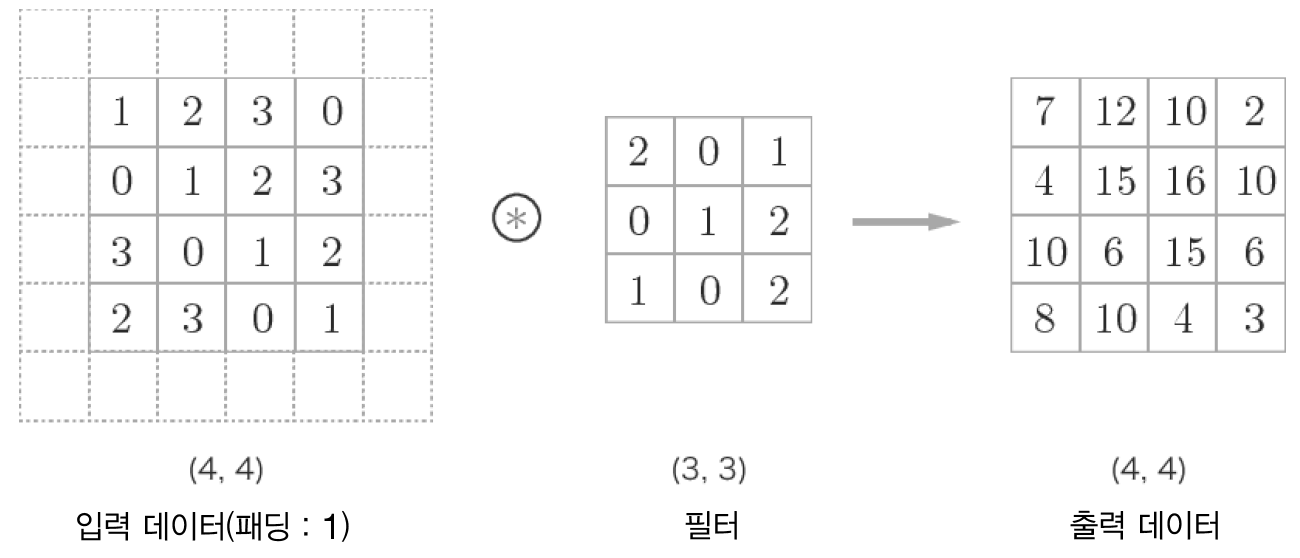

### conv ---> relu ---> pooling ---> conv ---> relu ---> pooling

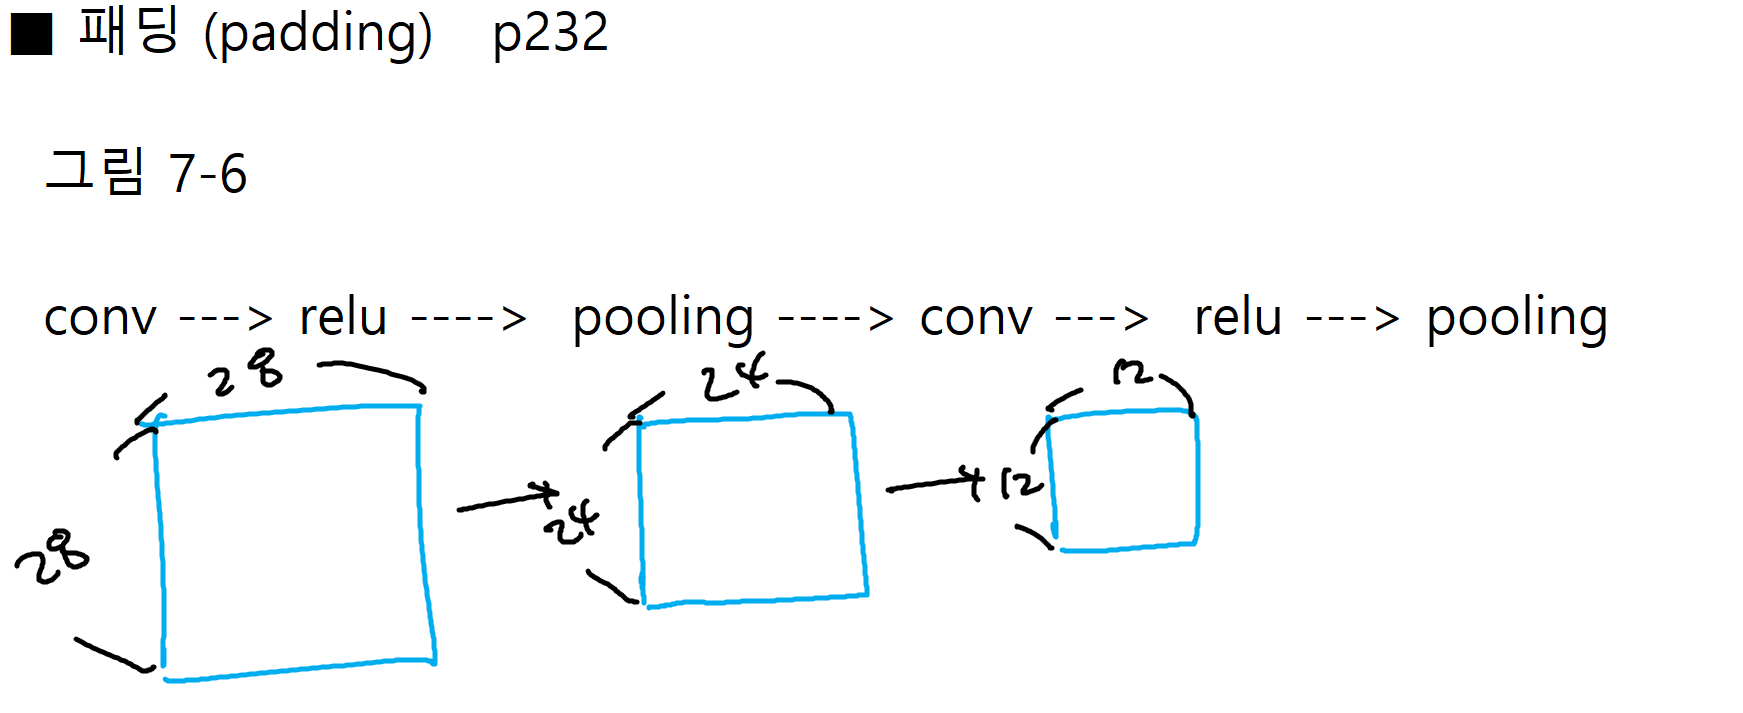

### ■ 패딩이란?

합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값으로 채워 늘리는 것을 말한다.

### ■ 패딩이 필요한 이유?( 딥러닝 면접문제 )

패딩을 하지 않을 경우에 data의 공간크기는 합성곱 계층이 지날때 마다 작아지게 되므로 가장 자리 정보들이 사라지게 되는 문제가 발생하게 된다.

__예 :__ 입력되는 4x4 행렬이 3x3 필터로 합성곱을 했을때 출력이 입력과 똑같은 4x4 행렬이 되려면 입력 행렬을 폭이 1인 패딩을 해야한다.

## 예제1. 아래의 행렬(2x2)을 제로 패딩 1을 해서 4x4 행렬로 만드시오.

In [30]:
import numpy as np
result = np.array([[18,19], [9,18]])
result_pad = np.pad(result, pad_width = 1, mode = 'constant', \
                    constant_values = 0)
print(result_pad)

[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


## 예제2. 아래의 4x4행렬에 3x3 필터를 적용해서 합성곱한 결과를 출력하시오!

In [37]:
import numpy  as np

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self,x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H + 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        return out

x = np.array( [[ 1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]] )
filter = np.array( [[2,0,1], [0,1,2], [1,0,2]] )
x1 = x.reshape( 1, 1, 4, 4 )
filter1 = filter.reshape(1,1,3,3)
b1 = 0
conv1 = Convolution( filter1 , b1, 1,  pad=0)  
fe_map = conv1.forward( x1 )

print (fe_map)

[[[[ 7. 12. 10.  2.]
   [ 4. 15. 16. 10.]
   [10.  6. 15.  6.]
   [ 8. 10.  4.  3.]]]]


## 문제73. (오늘의 마지막 문제) 아래의 4x4 행렬을 3x3 필터와 합성곱 했을때 결과가 padding을 해서 4x4 로 출력되게 하시오. 

In [38]:
import numpy  as np

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self,x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H + 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        return out

x = np.array( [[ 1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]] )
filter = np.array( [[2,0,1], [0,1,2], [1,0,2]] )
x1 = x.reshape( 1, 1, 4, 4 )
filter1 = filter.reshape(1,1,3,3)
b1 = 0
conv1 = Convolution( filter1 , b1, 1,  pad=1)  
fe_map = conv1.forward( x1 )

print (fe_map)

[[[[ 7. 12. 10.  2.]
   [ 4. 15. 16. 10.]
   [10.  6. 15.  6.]
   [ 8. 10.  4.  3.]]]]
